Importing libraries

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [18]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

Importing Dataset

In [19]:

training_data = pd.read_csv('train.ar.csv')
testing_data = pd.read_csv('test.ar.csv')

print("Training Data: {}".format(training_data.shape))
print("Null values present in training data: {}".format(training_data.isnull().values.any()))

print("Testing Data: {}".format(testing_data.shape))
print("Null values present in testing data: {}".format(testing_data.isnull().values.any()))

Training Data: (7352, 563)
Null values present in training data: False
Testing Data: (2947, 563)
Null values present in testing data: False


In [20]:
y_train = training_data['Activity']
X_train = training_data.drop(columns = ['Activity', 'subject'])

y_test = testing_data['Activity']
X_test = testing_data.drop(columns = ['Activity', 'subject'])

([<matplotlib.patches.Wedge at 0x82285bfcd0>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

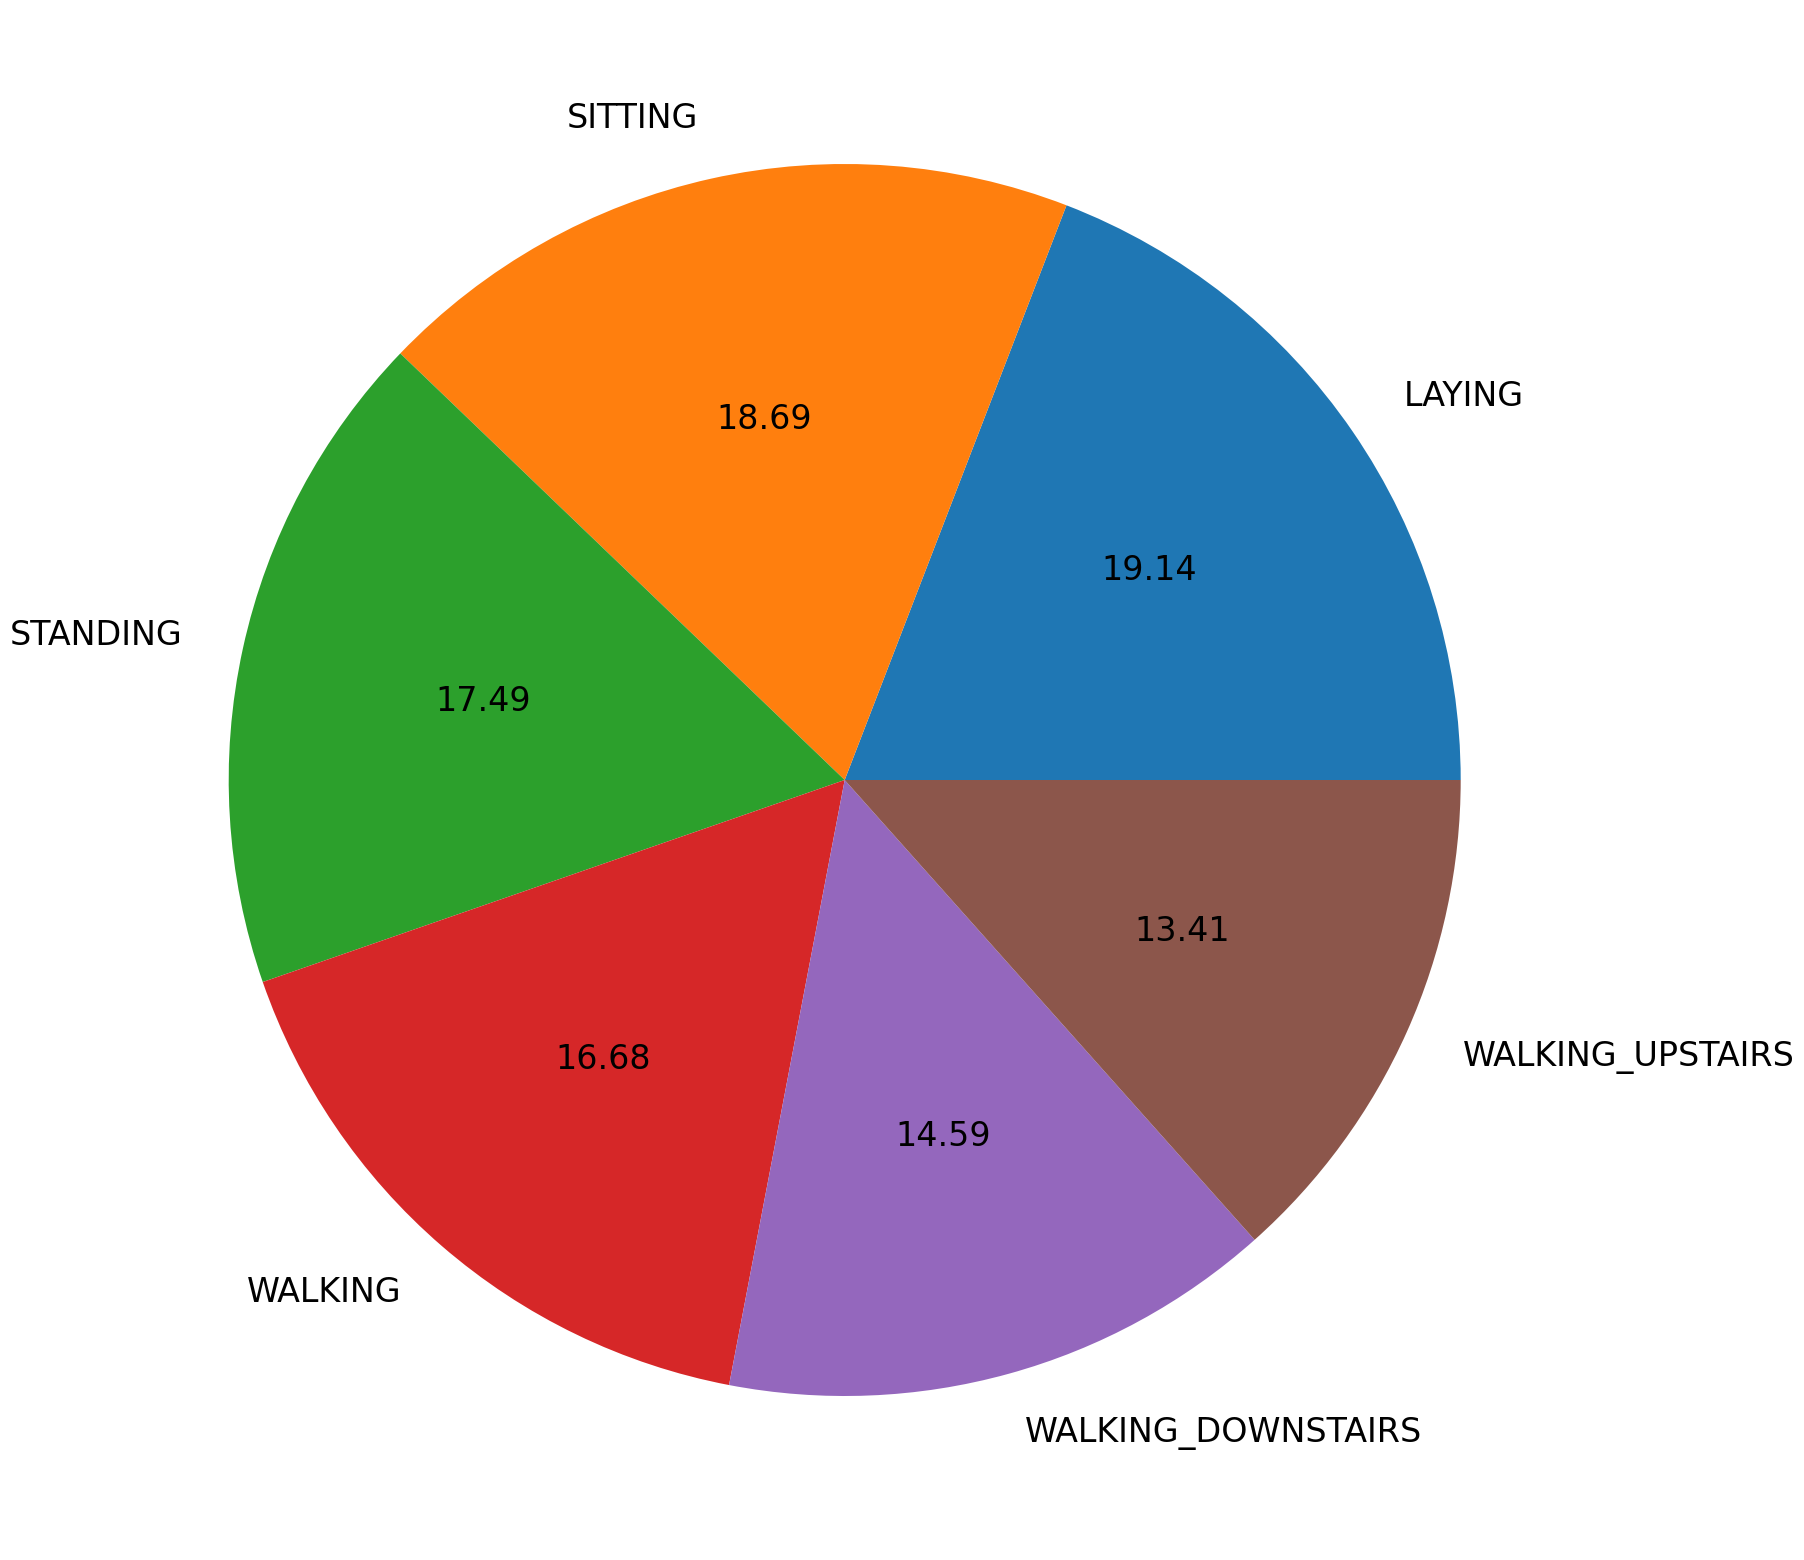

In [21]:
count_of_each_activity = np.array(y_train.value_counts())

activities = sorted(y_train.unique())

plt.rcParams.update({'figure.figsize': [20, 20], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

<BarContainer object of 3 artists>

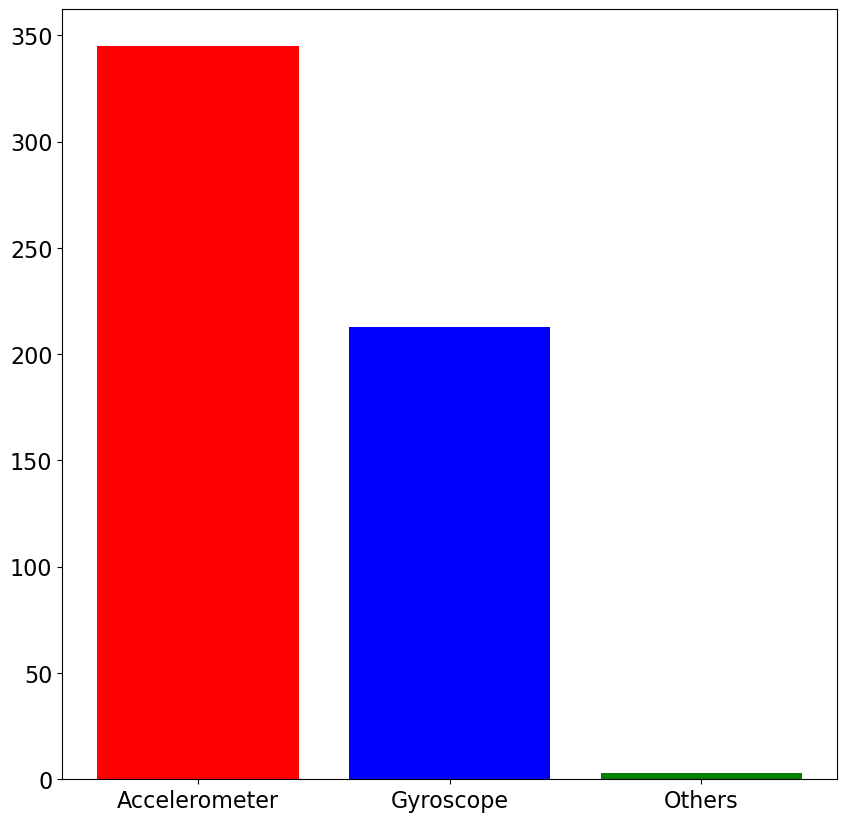

In [22]:
acc = 0
gyro = 0
others = 0
for column in X_train.columns:
    if 'Acc' in str(column):
        acc += 1
    elif 'Gyro' in str(column):
        gyro += 1
    else:
        others += 1

plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 16})
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [acc, gyro, others], color = ('r', 'b', 'g'))

In [23]:
standing_activity = training_data[training_data['Activity'] == 'STANDING']

standing_activity = standing_activity.reset_index(drop=True)

In [24]:
time = 1
index = 0
time_series = np.zeros(standing_activity.shape[0])
for row_number in range(standing_activity.shape[0]):
    if (row_number == 0 
        or standing_activity.iloc[row_number]['subject'] == standing_activity.iloc[row_number - 1]['subject']):
        time_series[index] = time
        time += 1
    else:
        time_series[index] = 1
        time = 2
    index += 1

time_series_df = pd.DataFrame({ 'Time': time_series })
standing_activity_df = pd.concat([standing_activity, time_series_df], axis = 1)

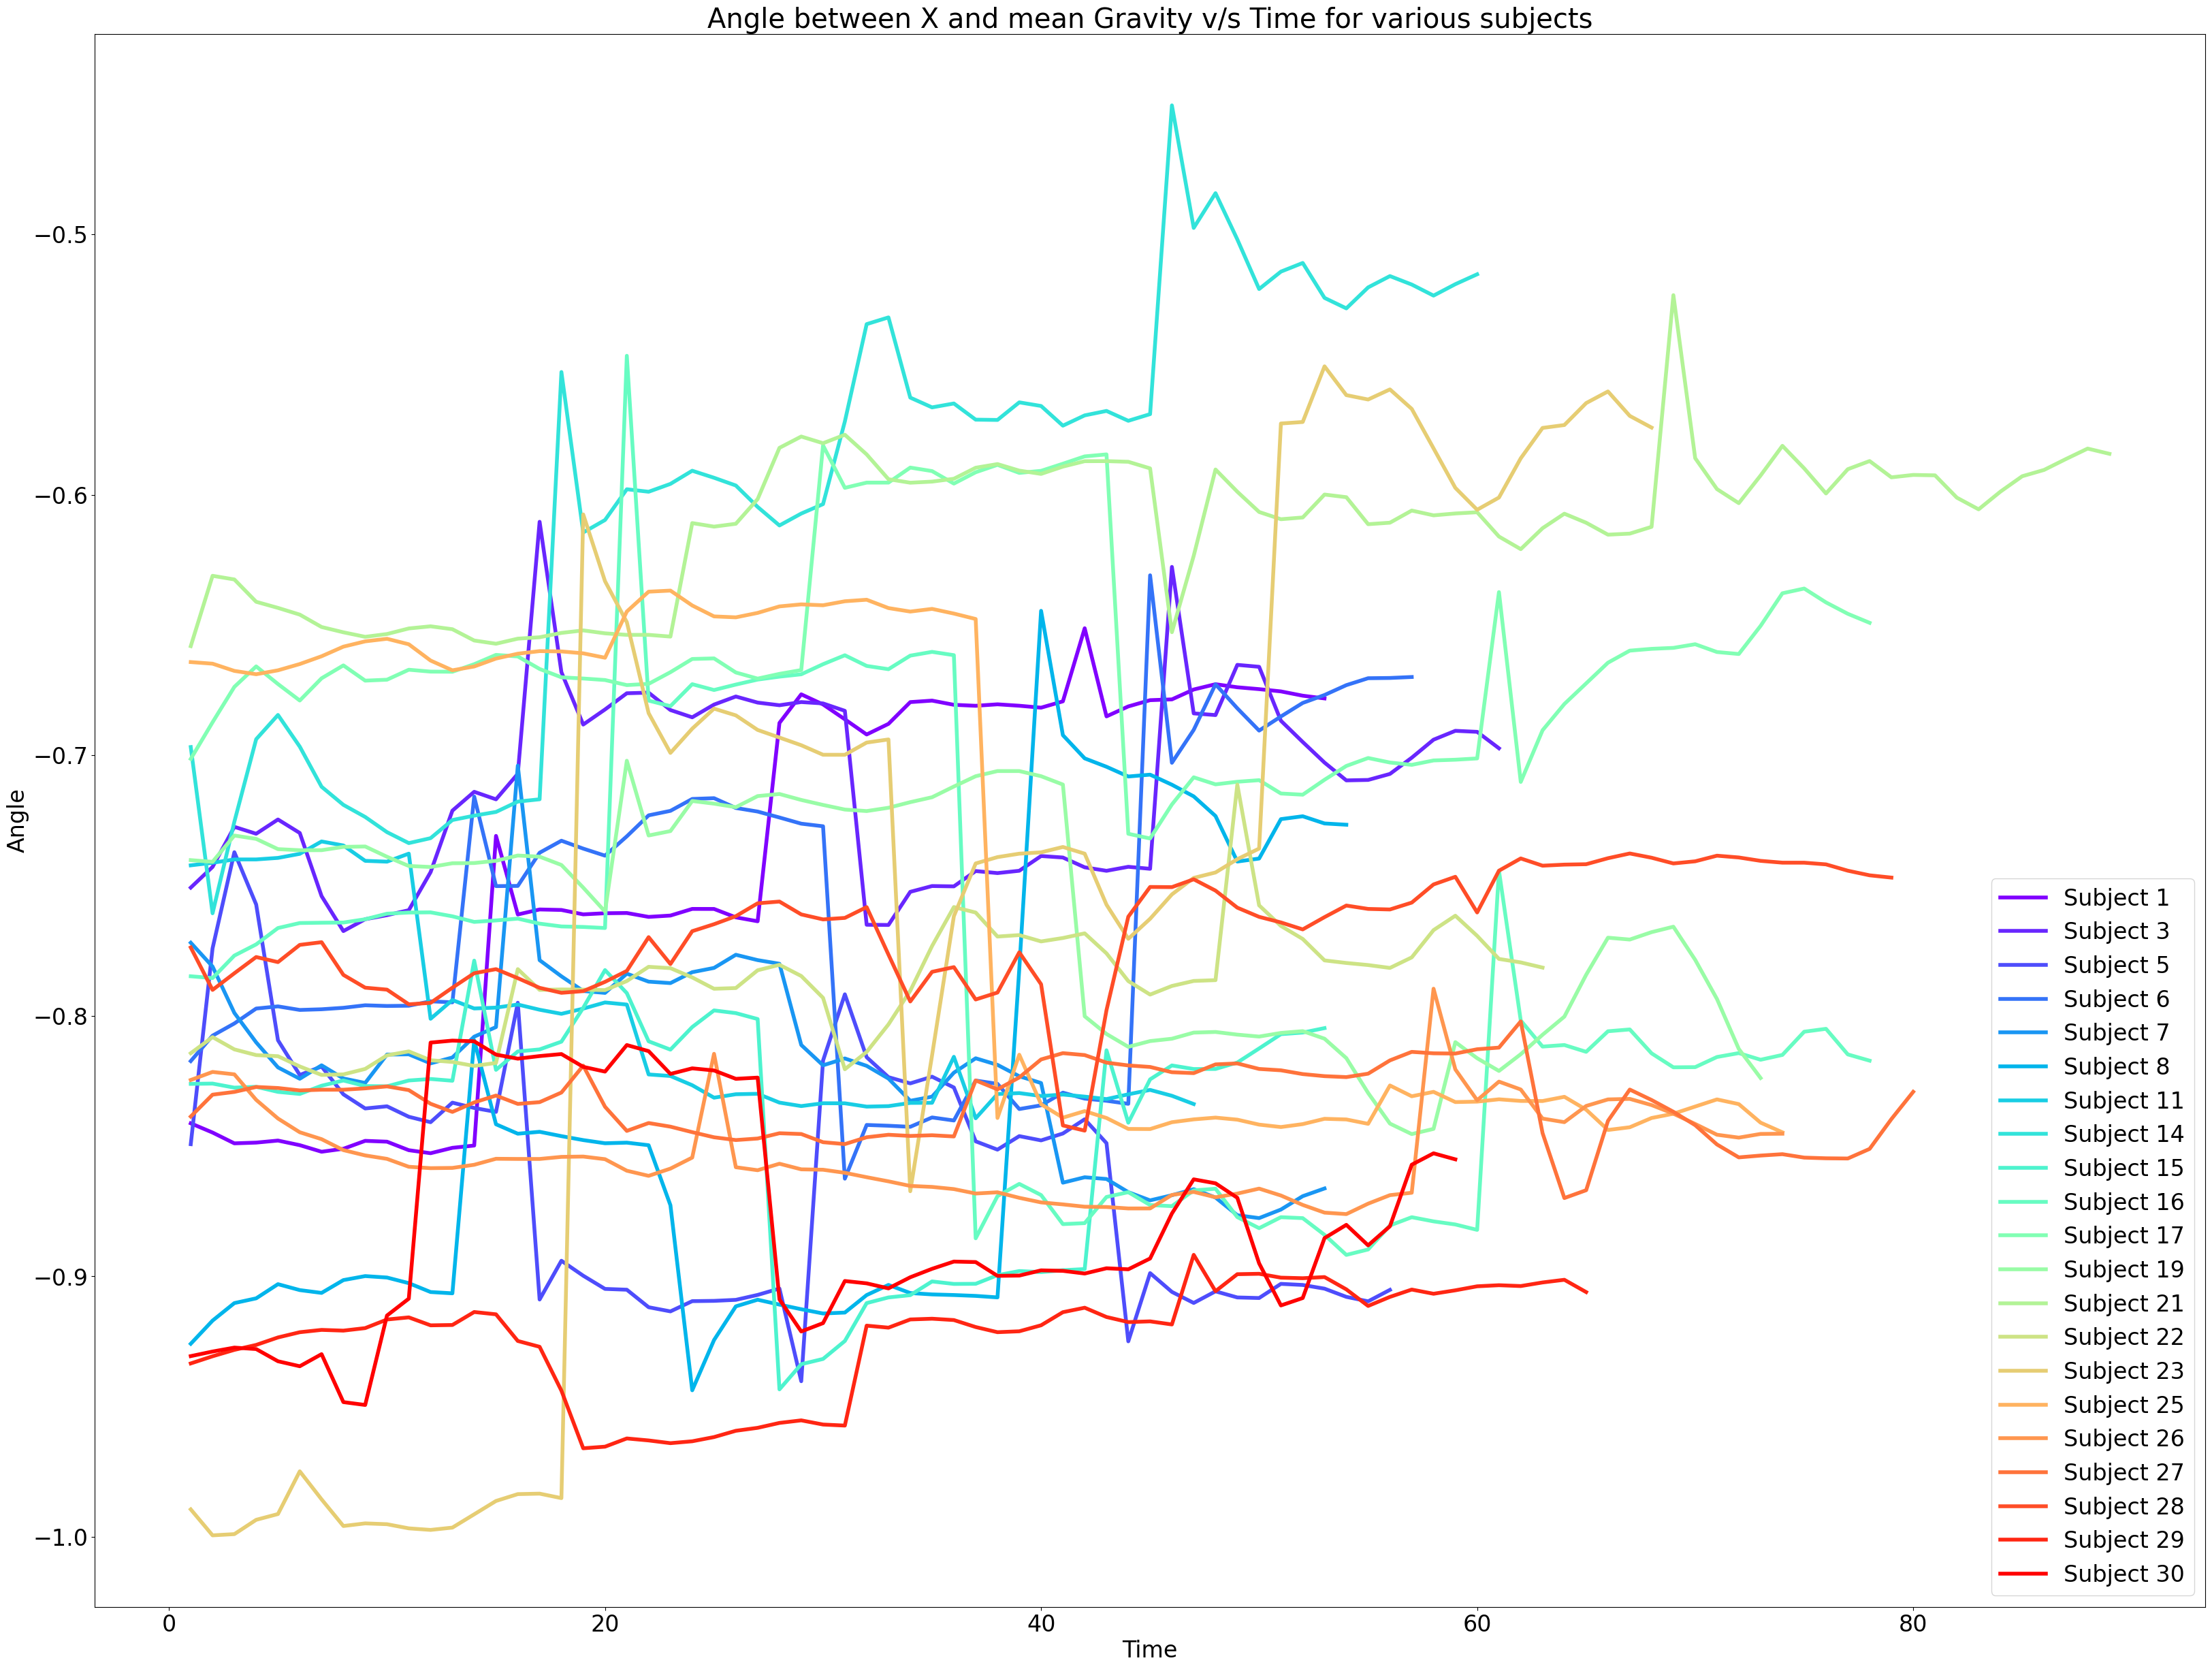

In [25]:
colors = cm.rainbow(np.linspace(0, 1, len(standing_activity_df['subject'].unique())))

id = 0
for subject in standing_activity_df['subject'].unique():
    plt.rcParams.update({'figure.figsize': [40, 30], 'font.size': 24})
    plt.plot(standing_activity_df[standing_activity_df['subject'] == subject]['Time'], 
             standing_activity_df[standing_activity_df['subject'] == subject]['angle(X,gravityMean)'],
             c = colors[id], 
             label = 'Subject ' + str(subject),
             linewidth = 4)
    plt.xlabel('Time')
    plt.ylabel('Angle')
    plt.title('Angle between X and mean Gravity v/s Time for various subjects')
    plt.legend(prop = {'size': 24})
    id += 1

In [26]:
accuracy_scores = np.zeros(4)

clf = SVC().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))


Support Vector Classifier accuracy: 95.04580929759076%


In [27]:
clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

Logistic Regression accuracy: 95.79233118425518%


c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

K Nearest Neighbors Classifier accuracy: 90.02375296912113%


In [29]:
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

Random Forest Classifier accuracy: 92.09365456396336%


Text(0.5, 1.0, 'Accuracy of various algorithms')

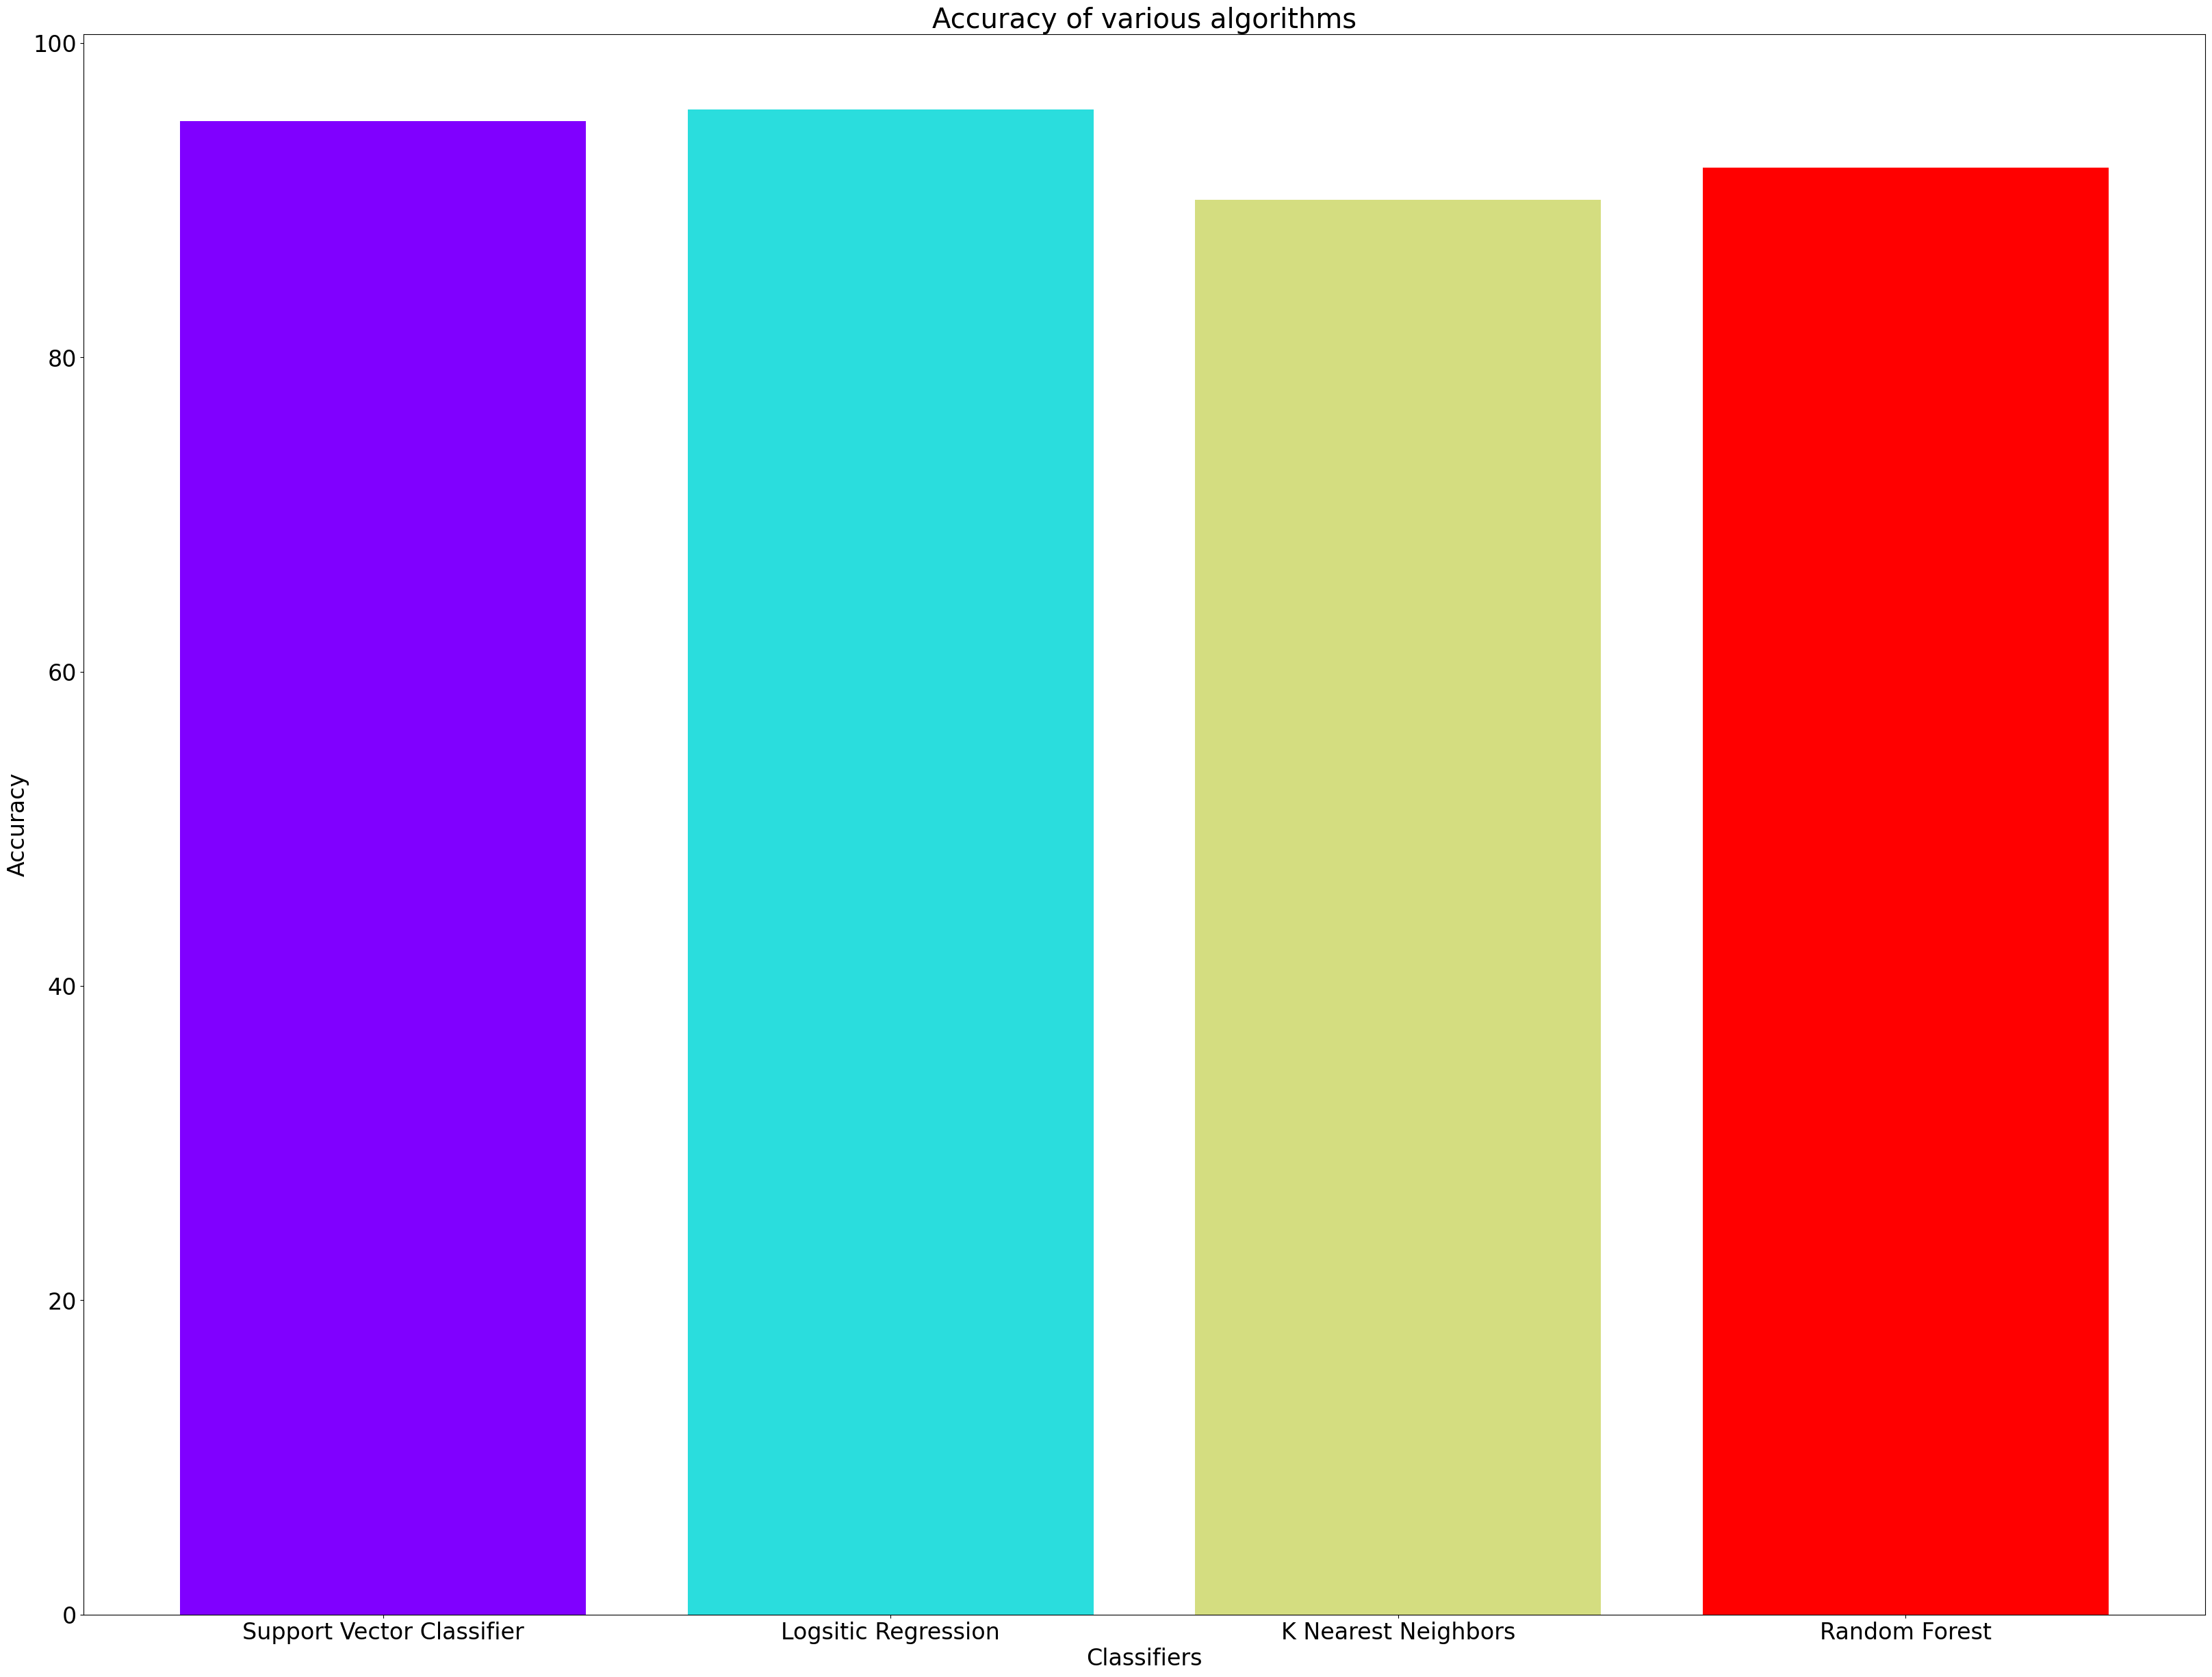

In [30]:
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Support Vector Classifier', 'Logsitic Regression', 'K Nearest Neighbors', 'Random Forest']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')